In [3]:
from google.colab import files
uploaded = files.upload()

Saving Fake_news.csv to Fake_news.csv


In [32]:
#neccessary Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix


Let Us Read the Data

In [5]:
df=pd.read_csv('Fake_news.csv')

Let Us Find The Shape of our Dataset


In [6]:
df.shape

(6335, 4)

Let Us Print 1st 10 Rows

In [7]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


Let Us Print last 5 Rows

In [8]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


Let Us Check For Null Values

In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

Data Visualization

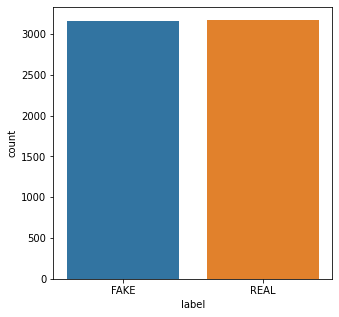

In [10]:
plt.figure(figsize=(5, 5))
sns.countplot(x ='label', data = df)
plt.show()

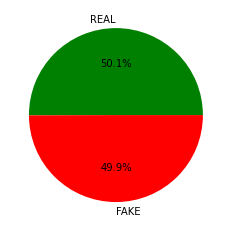

In [12]:
chart = plt.pie(df["label"].value_counts().values,explode=[0,0],labels=df.label.value_counts().index, autopct='%2.1f%%',colors=['green','red'])


Let us Write Code to generate Confusion Matrix

In [13]:


def show_confusion_matrix(cm, classes,normalize=False,title='CONFUSION MATRIX',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Let Us Define Our Parameters X and y

In [15]:
X = df['text']
y = df['label']

Let Us Split our data into Train and Test Data
(70% training set and  30% test set )

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Let Us Try Diffrent ML Algorithms

Let Us Try Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

In [43]:

from sklearn.ensemble import RandomForestClassifier

data = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=103, criterion="entropy"))])

model = data.fit(X_train, y_train)


In [44]:
Y_pred= model.predict(X_test)
target_names = ['fake', 'real']


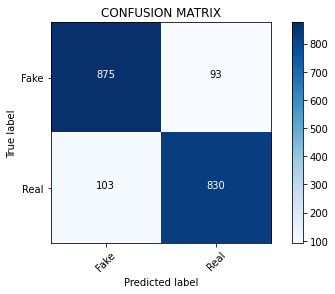

In [45]:
cm = confusion_matrix(y_test,Y_pred)
show_confusion_matrix(cm, classes=['Fake', 'Real'])



In [46]:
print(classification_report(y_test, Y_pred, target_names=target_names))



              precision    recall  f1-score   support

        fake       0.89      0.90      0.90       968
        real       0.90      0.89      0.89       933

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



Let Us Try Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [47]:
from sklearn.tree import DecisionTreeClassifier

data = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',max_depth = 20, splitter='best',random_state=42))])
model = data.fit(X_train, y_train)



In [48]:
Y_pred= model.predict(X_test)


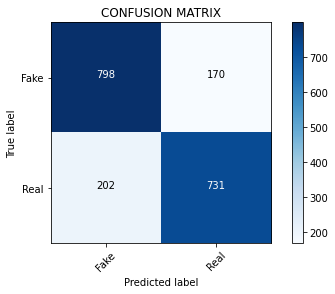

In [49]:
cm = confusion_matrix(y_test,Y_pred)
show_confusion_matrix(cm, classes=['Fake', 'Real'])



In [50]:
print(classification_report(y_test, Y_pred, target_names=target_names))



              precision    recall  f1-score   support

        fake       0.80      0.82      0.81       968
        real       0.81      0.78      0.80       933

    accuracy                           0.80      1901
   macro avg       0.80      0.80      0.80      1901
weighted avg       0.80      0.80      0.80      1901



Let Us Try With Logistic Regression

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

In [51]:

from sklearn.linear_model import LogisticRegression

data = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = data.fit(X_train, y_train)



In [52]:

Y_pred = model.predict(X_test)

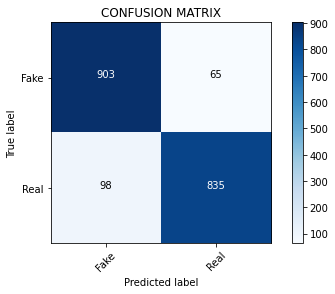

In [54]:
cm = confusion_matrix(y_test,Y_pred)
show_confusion_matrix(cm, classes=['Fake', 'Real'])



In [55]:
print(classification_report(y_test, Y_pred, target_names=target_names))



              precision    recall  f1-score   support

        fake       0.90      0.93      0.92       968
        real       0.93      0.89      0.91       933

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



Let us Try SVM

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

In [56]:
from sklearn import svm

data = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', svm.SVC(kernel='linear'))])

model = data.fit(X_train, y_train)


In [57]:


Y_pred = model.predict(X_test)


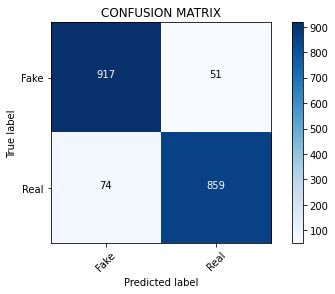

In [60]:
cm = confusion_matrix(y_test,Y_pred)
show_confusion_matrix(cm, classes=['Fake', 'Real'])



In [58]:
print(classification_report(y_test, Y_pred, target_names=target_names))



              precision    recall  f1-score   support

        fake       0.93      0.95      0.94       968
        real       0.94      0.92      0.93       933

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



Let Us Try  Passiveaggressiveclassifier

Passive-aggressive classification is one of the available incremental learning algorithms and it is very simple to implement, since it has a closed-form update rule. ... The core concept is that the classifier adjusts its weight vector for each misclassified training sample it receives, trying to correct it.

In [66]:


data = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', PassiveAggressiveClassifier(max_iter=50))])

model = data.fit(X_train, y_train)


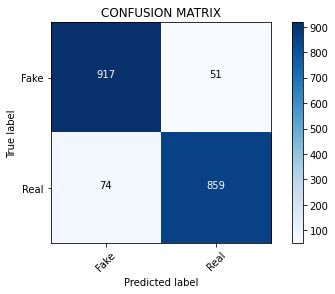

In [67]:
cm = confusion_matrix(y_test,Y_pred)
show_confusion_matrix(cm, classes=['Fake', 'Real'])



In [68]:
print(classification_report(y_test, Y_pred, target_names=target_names))



              precision    recall  f1-score   support

        fake       0.93      0.95      0.94       968
        real       0.94      0.92      0.93       933

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



RESULT


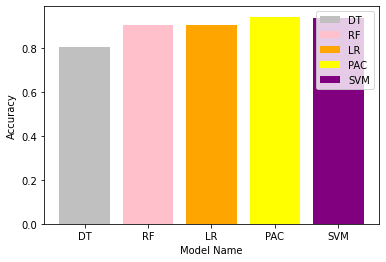

In [ ]:
plt.bar(['DT'],[dtac], label="DT", color='silver')
plt.bar(['RF'],[logac], label="RF", color='pink')
plt.bar(['LR'],[logac], label="LR", color='orange')
plt.bar(['PAC'],[pacac], label="PAC", color='yellow')
plt.bar(['SVM'],[svmac], label="SVM", color='purple')
plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

CONCLUSION

WE Found That Passiveaggressiveclassifier showed the best performence among the 5 algorithms used.It showed accuracy of 93.4%
